# Appendix B: PCA and logistic regression


In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn import metrics


In [2]:
#data processing

training_letter = pd.read_csv("./EMNIST/emnist-balanced-train.csv", header=0) # header to avoid using first column
testing_letter = pd.read_csv("./EMNIST/emnist-balanced-test.csv", header=0)

In [3]:
#training_letters
x1 = np.array(training_letter.iloc[:,1:].values)
y1 = np.array(training_letter.iloc[:,0].values)

#testing_letters
x2 = np.array(testing_letter.iloc[:,1:].values)
y2 = np.array(testing_letter.iloc[:,0].values)
print(x1.shape)
print(x2.shape)


(112799, 784)
(18799, 784)


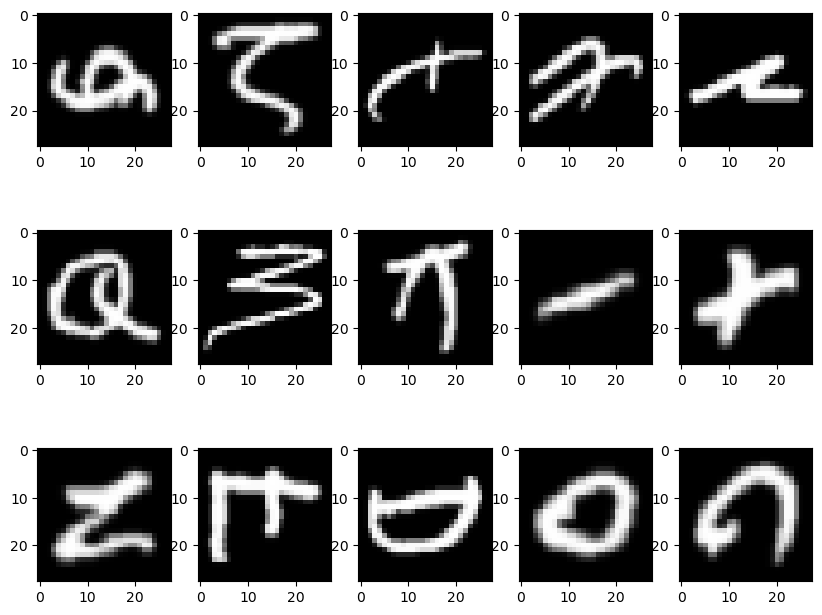

In [32]:
fig,axes = plt.subplots(3,5,figsize=(10,8))
for i,ax in enumerate(axes.flat):
    ax.imshow(x1[i].reshape([28,28]), cmap='gray')

In [4]:
#Using PCA
N = 82 # 82 components, as it gives the best results to computation ratio, check optimization part for more context

pca = PCA(n_components=N)
X_train_reduced = pca.fit_transform(x1)

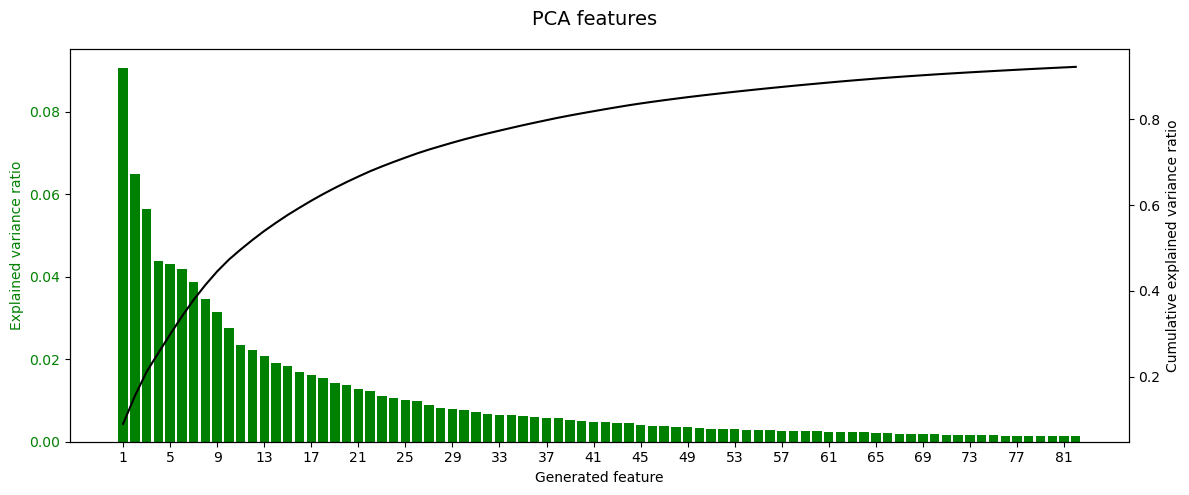

In [39]:
fig, ax1 = plt.subplots(figsize=(12, 5))
fig.suptitle("PCA features", fontsize=14)
color = 'tab:blue'
ax1.bar(1+np.arange(N), pca.explained_variance_ratio_, color="green")
ax1.set_xticks(1+np.arange(N, step=4))
ax1.tick_params(axis='y', labelcolor="green")
ax1.set_ylabel("Explained variance ratio", color="green")
ax1.set_xlabel("Generated feature")

ax2 = ax1.twinx()
color = 'tab:red'
ax2.tick_params(axis='y', labelcolor="black")
ax2.plot(1+np.arange(N), np.cumsum(pca.explained_variance_ratio_), color="black")
ax2.set_ylabel("Cumulative explained variance ratio", color="black")
fig.tight_layout()
plt.show()

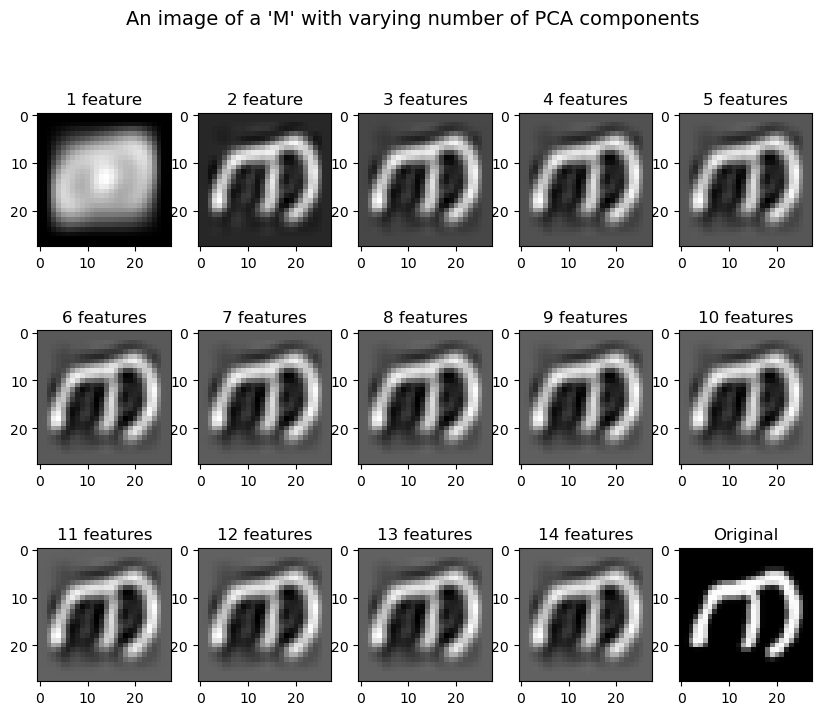

In [40]:
# Visualize the effect of PCA components
fig,axes = plt.subplots(3,5,figsize=(10,8))
fig.suptitle("An image of a 'M' with varying number of PCA components", fontsize=14, color="black")
for i,ax in enumerate(axes.flat):
    X_nfeatures = X_train_reduced[20]*[i]
    im = pca.inverse_transform(X_nfeatures).reshape(28, 28)
    ax.set_title(f"{(i+1)} feature{'s' if i>1 else ''}", color="black")
    ax.imshow(im, cmap='gray')
ax.set_title("Original")
ax.imshow(x1[20].reshape([28,28]), cmap='gray')

In [9]:
# PCA not used here
clf = LogisticRegression(solver='sag')
clf.fit(x1, y1)

c:\Users\rafal\anaconda3\envs\tf\lib\site-packages\sklearn\linear_model\_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


LogisticRegression(solver='sag')

In [41]:
# PCA used here
X_test_reduced = pca.fit_transform(x2)
clfPCA = LogisticRegression(solver='sag')
x_train_reduced = pca.fit_transform(x1)

clfPCA.fit(x_train_reduced, y1)

LogisticRegression(solver='sag')

In [42]:
y_pred = clf.predict(x2)
multi_accuracy = metrics.accuracy_score(y2, y_pred)

y_pred2 = clf.predict(x1)
train_acc = metrics.accuracy_score(y1, y_pred2)

y_predPCA = clfPCA.predict(X_train_reduced)
PCA_acc = metrics.accuracy_score(y1, y_predPCA)

loss_func = metrics.log_loss(y2, clfPCA.predict_log_proba(X_test_reduced))

print(f"Training accuracy: {100*train_acc:.2f}%")
print(f"Prediction without PCA accuracy: {100*multi_accuracy:.2f}%")
print(f"Prediction with PCA accuracy: {100*PCA_acc:.2f}%")
print(f"Loss function: {loss_func:.2f}")


Training accuracy: 72.94%
Prediction without PCA accuracy: 67.47%
Prediction with PCA accuracy: 67.66%
Loss function: 3.85%
